In [1]:
from datasets import load_dataset

In [4]:
# dataset = load_dataset("liuhaotian/LLaVA-Instruct-150K", split="train")

In [5]:
!wget -c https://huggingface.co/datasets/liuhaotian/LLaVA-Instruct-150K/resolve/main/llava_instruct_150k.json

--2024-01-19 17:09:33--  https://huggingface.co/datasets/liuhaotian/LLaVA-Instruct-150K/resolve/main/llava_instruct_150k.json
Resolving huggingface.co (huggingface.co)... 13.225.131.94, 13.225.131.6, 13.225.131.93, ...
Connecting to huggingface.co (huggingface.co)|13.225.131.94|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/4d/41/4d41ea1e2709f0e68e9e361e4218192b9620c5a3f2cb8055bc625942b6cd3039/6b68bc5ca2bfd8a71119af0e8454929668ccda6a334955ccc95d114fc8d082fa?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27llava_instruct_150k.json%3B+filename%3D%22llava_instruct_150k.json%22%3B&response-content-type=application%2Fjson&Expires=1705923573&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwNTkyMzU3M319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy80ZC80MS80ZDQxZWExZTI3MDlmMGU2OGU5ZTM2MWU0MjE4MTkyYjk2MjBjNWEzZjJjYjgwNTViYzYyNTk0MmI2Y2QzMDM5LzZiNjh

In [2]:
from datasets import Dataset

In [8]:
ds = Dataset.from_json("llava_instruct_150k.json", split="train")

In [9]:
ds

Dataset({
    features: ['id', 'image', 'conversations'],
    num_rows: 157712
})

In [5]:
ds[0]

{'id': '000000033471',
 'image': '000000033471.jpg',
 'conversations': [{'from': 'human',
   'value': '<image>\nWhat are the colors of the bus in the image?'},
  {'from': 'gpt', 'value': 'The bus in the image is white and red.'},
  {'from': 'human',
   'value': 'What feature can be seen on the back of the bus?'},
  {'from': 'gpt', 'value': 'The back of the bus features an advertisement.'},
  {'from': 'human',
   'value': 'Is the bus driving down the street or pulled off to the side?'},
  {'from': 'gpt',
   'value': 'The bus is driving down the street, which is crowded with people and other vehicles.'}]}

In [27]:
ds[0]

{'id': '000000033471',
 'image': '000000033471.jpg',
 'conversations': [{'from': 'human',
   'value': '<image>\nWhat are the colors of the bus in the image?'},
  {'from': 'gpt', 'value': 'The bus in the image is white and red.'},
  {'from': 'human',
   'value': 'What feature can be seen on the back of the bus?'},
  {'from': 'gpt', 'value': 'The back of the bus features an advertisement.'},
  {'from': 'human',
   'value': 'Is the bus driving down the street or pulled off to the side?'},
  {'from': 'gpt',
   'value': 'The bus is driving down the street, which is crowded with people and other vehicles.'}]}

In [10]:
len(ds)

157712

In [12]:
df = ds.to_pandas()

In [14]:
df.image.unique().shape

(81479,)

In [16]:
!wget -c http://images.cocodataset.org/zips/train2014.zip

--2024-01-19 18:56:07--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 16.182.65.17, 52.216.208.17, 52.217.227.193, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|16.182.65.17|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [21]:
# !unzip train2014.zip

In [10]:
ds_stream = ds.to_iterable_dataset()

In [12]:
from PIL import Image

In [35]:
def get_image(image_path):
    image_path = f"train2014/COCO_train2014_{image_path}"
    img = Image.open(image_path)
    return img

In [22]:
chat_template = """<|im_start|>system
You are a helpful assistant who always respond to user queries. For context you can use image data enclosed between <img> and </img> tags and you can use audio data enclosed between <aud> and </aud> tags<|im_end|>
<im_start>user
{prompt}<|im_end|>
<|im_start|>assistant
"""

In [5]:
from PIL import Image

In [7]:
img = Image.open("train2014/COCO_train2014_000000334872.jpg")

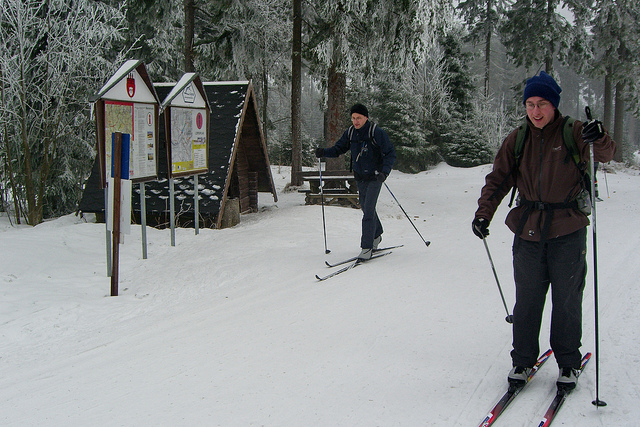

In [8]:
img

In [ ]:
{'id': '000000334872',
 'image': '000000334872.jpg',
 'conversations': [{'from': 'human',
   'value': '<image>\nAre the people in the image skiing downhill or cross-country skiing?'},
  {'from': 'gpt',
   'value': 'The people in the image are cross-country skiing in the woods, as they are skiing on a trail rather than a steep slope.'},
  {'from': 'human', 'value': 'How many people are in the image?'},
  {'from': 'gpt',
   'value': 'There are two people in the image, both on skis in the snow.'},
  {'from': 'human', 'value': 'What kind of environment are they skiing in?'},
  {'from': 'gpt',
   'value': 'They are skiing in a wooded environment, following a trail through the trees while surrounded by snow.'},
  {'from': 'human',
   'value': 'Do the skiers have any additional gear with them besides their skis and poles?'},
  {'from': 'gpt',
   'value': 'Yes, the two male skiers are carrying backpacks while they ski through the woods. The backpacks might contain essentials for their skiing adventure, such as food, water, extra clothing, or safety equipment.'}]}

In [36]:
# ChatML format
templates = {
    "assistant": "<|im_start|>assistant\n{msg}<|im_end|>",      # message by assistant
    "user": "<|im_start|>user\n{msg}<|im_end|>"       # message by user
}
def get_chatml_text(conversations):
    chatml_text = ""
    for conversation in conversations:
        role = conversation["from"]
        role = "user" if role == "human" else "assistant"
        content = conversation["value"]

        formatted_text = templates[role].format(msg=content)
        chatml_text += formatted_text + "\n"
    return chatml_text

In [28]:
get_chatml_text(ds[0]["conversations"])

'<|im_start|>user\n<image>\nWhat are the colors of the bus in the image?<|im_end|>\n<|im_start|>assistant\nThe bus in the image is white and red.<|im_end|>\n<|im_start|>user\nWhat feature can be seen on the back of the bus?<|im_end|>\n<|im_start|>assistant\nThe back of the bus features an advertisement.<|im_end|>\n<|im_start|>user\nIs the bus driving down the street or pulled off to the side?<|im_end|>\n<|im_start|>assistant\nThe bus is driving down the street, which is crowded with people and other vehicles.<|im_end|>\n'

In [37]:
def instruct_data_generator():
    for sample in ds_stream:
        image_path = sample["image"]
        conversations = sample["conversations"]
        
        image = get_image(image_path)
        text = get_chatml_text(conversations)
        yield {"text": text, "image": image}

In [38]:
from datasets import IterableDataset

In [39]:
instruct_ds = IterableDataset.from_generator(generator=instruct_data_generator)

In [40]:
for sample in instruct_ds:
    print(sample)
    break

{'text': '<|im_start|>user\n<image>\nWhat are the colors of the bus in the image?<|im_end|>\n<|im_start|>assistant\nThe bus in the image is white and red.<|im_end|>\n<|im_start|>user\nWhat feature can be seen on the back of the bus?<|im_end|>\n<|im_start|>assistant\nThe back of the bus features an advertisement.<|im_end|>\n<|im_start|>user\nIs the bus driving down the street or pulled off to the side?<|im_end|>\n<|im_start|>assistant\nThe bus is driving down the street, which is crowded with people and other vehicles.<|im_end|>\n', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x7F4CA08BD0F0>}


In [3]:
import json
with open("llava_v1_5_mix665k.json", "rb") as f:
    data = json.load(f)

In [4]:
data[0]

{'id': '000000033471',
 'image': 'coco/train2017/000000033471.jpg',
 'conversations': [{'from': 'human',
   'value': '<image>\nWhat are the colors of the bus in the image?'},
  {'from': 'gpt', 'value': 'The bus in the image is white and red.'},
  {'from': 'human',
   'value': 'What feature can be seen on the back of the bus?'},
  {'from': 'gpt', 'value': 'The back of the bus features an advertisement.'},
  {'from': 'human',
   'value': 'Is the bus driving down the street or pulled off to the side?'},
  {'from': 'gpt',
   'value': 'The bus is driving down the street, which is crowded with people and other vehicles.'}]}

In [9]:
import os

In [15]:
for image_file in os.listdir("./train2014/"):
    os.rename(f"./train2014/{image_file}", f"./train2014/{image_file.split('_')[2]}")

'000000472880.jpg'